In [36]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [40]:
# Preprocess the dataset: resize to 32x32 and convert to 3 channels
x_train = tf.image.resize(x_train[..., tf.newaxis], [32, 32])
x_test = tf.image.resize(x_test[..., tf.newaxis], [32, 32])


In [42]:
# Convert grayscale to RGB by repeating the channel 3 times
x_train = tf.image.grayscale_to_rgb(x_train)
x_test = tf.image.grayscale_to_rgb(x_test)


In [44]:
# Normalize the images to [0, 1] range
x_train = x_train / 255.0
x_test = x_test / 255.0


In [46]:
# Load pre-trained ResNet50 model + higher level layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [47]:
# Unfreeze some layers in the base model
for layer in base_model.layers[-10:]:  # Unfreeze the last 10 layers
    layer.trainable = True


In [50]:
# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)


In [52]:
# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object with data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator to the training data
datagen.fit(x_train)


In [56]:
# Compile the model with a different optimizer and learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(x_test, y_test))




Epoch 1/20


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 480s 237ms/step - accuracy: 0.6549 - loss: 1.0345 - val_accuracy: 0.8364 - val_loss: 0.4400
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 439s 234ms/step - accuracy: 0.8113 - loss: 0.5322 - val_accuracy: 0.8470 - val_loss: 0.4238
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 440s 234ms/step - accuracy: 0.8351 - loss: 0.4649 - val_accuracy: 0.8802 - val_loss: 0.3468
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 438s 234ms/step - accuracy: 0.8498 - loss: 0.4171 - val_accuracy: 0.8808 - val_loss: 0.3370
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 450s 240ms/step - accuracy: 0.8587 - loss: 0.3932 - val_accuracy: 0.8734 - val_loss: 0.3472
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 454s 242ms/step - accuracy: 0.8682 - loss: 0.3660 - val_accuracy: 0.8913 - val_loss: 0.3072
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 453s 242ms/step - accuracy: 0.8656 - loss: 0.3643 - val_accuracy: 0.8890 - val_loss: 0.3229
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 445s 237ms/step - accuracy: 0.8

In [59]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.9158 - loss: 0.2391
Test accuracy: 0.9150999784469604


In [61]:
# Predict the labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step


In [63]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

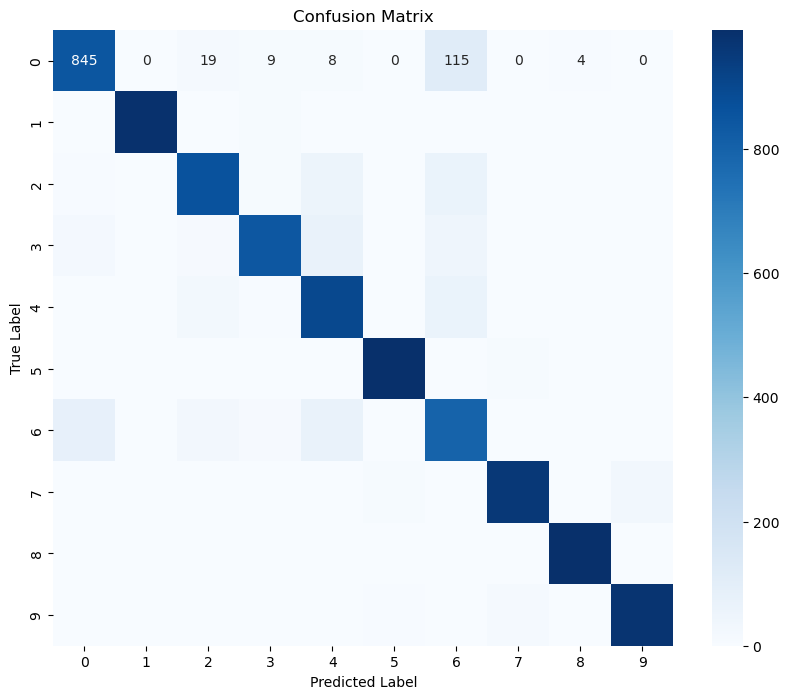

In [65]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [67]:
# Print classification report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1000
           1       1.00      0.99      0.99      1000
           2       0.91      0.86      0.89      1000
           3       0.94      0.84      0.89      1000
           4       0.81      0.90      0.85      1000
           5       0.98      0.99      0.99      1000
           6       0.73      0.80      0.76      1000
           7       0.97      0.96      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

